In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Plotting function to get a feel of it

x = np.arange(-10, 10, 0.001)
f = lambda x : (x - 1)**4 + x**2

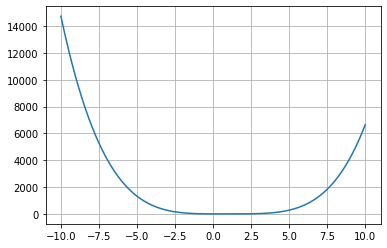

In [3]:
plt.plot(x,f(x))
plt.grid()
plt.show()

In [4]:
#Bisection method

def find_root_bisection(f,a,b):
    while (abs(a-b)>=0.000001):
        mid = (a+b)/2
        f_a = f(a)
        f_b = f(b)
        f_mid = f(mid)
        if np.sign(f_mid)!= np.sign(f_a):
            b = mid
        else: a = mid
    return mid

In [5]:
#Bisection method testing

f = lambda x:x**2 -5
print (find_root_bisection(f,0,4))

2.236067771911621


In [6]:
#Newton-Raphson's method

def find_root_newton_raphson(f,deriv_f,guess):
    f_by_deriv = f(guess) / deriv_f(guess)
    while abs(f_by_deriv) >= 0.000001:
        f_by_deriv = f(guess) / deriv_f(guess)
        guess = guess - f_by_deriv     
    return guess

In [7]:
#Newton-Raphson's method testing

f = lambda x:x**2 -5
deriv_f = lambda x:2*x
guess = 3
print(find_root_newton_raphson(f,deriv_f,guess))

2.236067977499978


In [8]:
#Using of root-finding methods for finding the root of f-prime. 

f = lambda x : (x - 1)**4 + x**2
f_prime = lambda x: 4*(x - 1)**3 + 2*x
deriv_f_prime= lambda x: 12*(x - 1)**2 + 2
guess=2
print ('Bisection method: x_min: %.02f, f(x_min): %.02f' % (find_root_bisection(f_prime,0,4), f(find_root_bisection(f_prime,0,4))))
print('Newton-Raphsons method: x_min: %.02f, f(x_min): %.02f' % (find_root_newton_raphson(f_prime,deriv_f_prime,guess),  f(find_root_newton_raphson(f_prime,deriv_f_prime,guess))))

Bisection method: x_min: 0.41, f(x_min): 0.29
Newton-Raphsons method: x_min: 0.41, f(x_min): 0.29


x_min: 0.41, f(x_min): 0.29


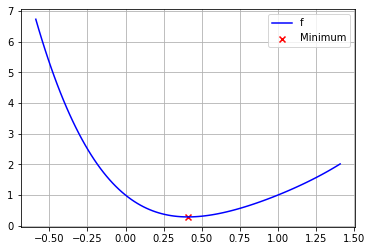

In [9]:
#Checking our methods against Brent's method for optimization

f = lambda x : (x - 1)**4 + x**2

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar

res = minimize_scalar(f, method='brent')
print('x_min: %.02f, f(x_min): %.02f' % (res.x, res.fun))

# plot curve
x = np.linspace(res.x - 1, res.x + 1, 100)
y = [f(val) for val in x]
plt.plot(x, y, color='blue', label='f')

# plot optima
plt.scatter(res.x, res.fun, color='red', marker='x', label='Minimum')

plt.grid()
plt.legend(loc = 1)

In [10]:
#Gradient Descent method 

def gradient_descent(f, f_prime, start, learning_rate = 0.1):
    x = start
    while abs(f_prime(x)) > 0.001:
        x = x - learning_rate*f_prime(x)
    return x
    
f = lambda x : (x - 1) ** 4 + x ** 2
f_prime = lambda x : 4*((x-1)**3) + 2*x
start = -1
x_min = gradient_descent(f, f_prime, start, 0.01)
f_min = f(x_min)

print("xmin: %0.2f, f(x_min): %0.2f" % (x_min, f_min))

xmin: 0.41, f(x_min): 0.29


In [11]:
#Solving linear problem with the Simplex method

from scipy.optimize import linprog

def solve_linear_problem(A, b, c):    
    x0_bounds = (0, None)
    x1_bounds = (0, None)
    res = linprog(c, A_ub=A, b_ub=b,  bounds=(x0_bounds, x1_bounds), method='simplex')
    return res.fun,res.x

In [12]:
A = np.array([[2, 1], [-4, 5], [1, -2]])
b = np.array([10, 8, 3])
c = np.array([-1, -2])

optimal_value, optimal_arg = solve_linear_problem(A, b, c)

print("The optimal value is: ", optimal_value, " and is reached for x = ", optimal_arg)

The optimal value is:  -11.0  and is reached for x =  [3. 4.]
